<center>
<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/1/1d/Logo_T%C3%A9l%C3%A9com_SudParis.svg/1014px-Logo_T%C3%A9l%C3%A9com_SudParis.svg.png" width="10%" />
</center>

<center> <h2> NET 4550 Machine Learning </h2> </center>

# QoE - Project From Network Traffic Measurements to QoE for Internet Video

#### QoE = Quality of Experience

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pickle
from os.path import isfile


In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
print("Dimensions du dataset:", df.shape)
df.head()

Dimensions du dataset: (111919, 270)


,videoID,category,bitrates_144p,bitrates_240p,bitrates_360p,bitrates_480p,bitrates_720p,bitrates_1080p,join_time,stallingNumber,...,QoE_JT,QoE_noStall,QoE_noSwitches,QoE_Linear,QoE_Linear2,QoE_Linear3,QoE_LD_SD_HD,QoE_ITU_023,QoE_ITU_035,QoE_ITU_046
0,NeZ8BQBl8NA,Film & Animation,67101,63551,123054,205503,422644,824186,3411,0,...,1,0,0,5.0,5.0,5.0,2,5.0,4.44397,4.42413
1,FWpRqKpV0rY,Education,76305,111936,204952,340239,744420,1683577,2883,0,...,1,0,0,5.0,5.0,5.0,2,5.0,4.61882,4.58419
2,n72yt5hc3-A,Travel & Events,91757,123729,195255,303189,682584,1385367,4803,0,...,1,0,0,5.0,5.0,5.0,2,5.0,4.58990,4.55993
3,v0_uAqzWlUM,Sports,91222,162811,305089,531184,1191866,2349128,310000,0,...,0,0,0,0.0,0.0,0.0,0,5.0,4.68886,4.63004
4,aD3Ahnee0Ck,Film & Animation,104747,223032,411669,682377,1345939,2442657,310000,0,...,0,0,0,0.0,0.0,0.0,0,-1.0,-1.00000,-1.00000


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111919 entries, 0 to 111918
Data columns (total 270 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    videoID                        object 
 1    category                       object 
 2    bitrates_144p                  int64  
 3    bitrates_240p                  int64  
 4    bitrates_360p                  int64  
 5    bitrates_480p                  int64  
 6    bitrates_720p                  int64  
 7    bitrates_1080p                 int64  
 8    join_time                      int64  
 9    stallingNumber                 int64  
 10   totalStallDuration             int64  
 11   outbandQoS_DL_TP               float64
 12   outbandQoS_UL_TP               float64
 13   outbandQoS_RTT                 float64
 14   outbandQoS_RTT_STD             float64
 15   outbandQoS_LOSS                float64
 16   pcapStats_stats_avg_DL_TP      float64
 17   pcapStats_stats_avg_UL_t   

## Retrait des valeurs non pertinentes

In [5]:
df.describe()

,bitrates_144p,bitrates_240p,bitrates_360p,bitrates_480p,bitrates_720p,bitrates_1080p,join_time,stallingNumber,totalStallDuration,outbandQoS_DL_TP,...,QoE_JT,QoE_noStall,QoE_noSwitches,QoE_Linear,QoE_Linear2,QoE_Linear3,QoE_LD_SD_HD,QoE_ITU_023,QoE_ITU_035,QoE_ITU_046
count,111919.000000,111919.000000,1.119190e+05,1.119190e+05,1.119190e+05,1.119190e+05,111919.000000,111919.000000,1.119190e+05,111919.000000,...,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000,111919.000000
mean,84332.577981,161488.427309,2.969415e+05,5.182005e+05,1.042117e+06,1.942902e+06,25931.106792,0.261645,8.438969e+02,2718.626028,...,0.933872,0.113600,0.678535,3.701106,3.580089,3.421945,1.118353,4.701973,3.508724,3.477920
std,20668.859700,56534.866093,1.052576e+05,1.989788e+05,4.036144e+05,7.196426e+05,75781.259241,1.021496,8.400910e+03,2214.803320,...,0.248507,0.317326,0.467041,1.442905,1.488462,1.536845,0.848809,1.103947,1.218091,1.224797
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.503000e+03,424.000000,0.000000,0.000000e+00,14.413600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,80330.500000,123167.500000,2.260455e+05,3.745360e+05,7.558940e+05,1.466794e+06,2150.000000,0.000000,0.000000e+00,959.413500,...,1.000000,0.000000,0.000000,2.977380,2.711540,2.354365,0.000000,5.000000,2.888710,2.812640
50%,91811.000000,173440.000000,3.190800e+05,5.480470e+05,1.104771e+06,2.096539e+06,3627.000000,0.000000,0.000000e+00,2160.470000,...,1.000000,0.000000,1.000000,4.221490,4.086810,3.929890,1.000000,5.000000,3.816160,3.833200
75%,96949.000000,208920.500000,3.848440e+05,6.891835e+05,1.388100e+06,2.536442e+06,9592.000000,0.000000,0.000000e+00,3958.370000,...,1.000000,0.000000,1.000000,4.897620,4.854170,4.784930,2.000000,5.000000,4.440985,4.423630
max,224840.000000,912737.000000,1.737032e+06,2.469066e+06,6.597562e+06,1.617896e+07,310000.000000,55.000000,1.149329e+06,10000.900000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,4.922150


In [6]:
def remove_zero_bitrates(df):

    bitrate_columns = [
        'bitrates_144p', 'bitrates_240p', 'bitrates_360p', 
        'bitrates_480p', 'bitrates_720p', 'bitrates_1080p'
    ]
    # Vérification que les colonnes existent
    available_bitrate_columns = [col for col in bitrate_columns if col in df.columns]
    
    if not available_bitrate_columns:
        return df
    
    # Création du masque pour les lignes où tous les bitrates sont non nuls
    mask = (df[available_bitrate_columns] != 0).all(axis=1)
    
    # Application du filtre
    return df[mask]

# Application de la fonction
df_cleaned = remove_zero_bitrates(df)

In [7]:
df_cleaned.describe()

,bitrates_144p,bitrates_240p,bitrates_360p,bitrates_480p,bitrates_720p,bitrates_1080p,join_time,stallingNumber,totalStallDuration,outbandQoS_DL_TP,...,QoE_JT,QoE_noStall,QoE_noSwitches,QoE_Linear,QoE_Linear2,QoE_Linear3,QoE_LD_SD_HD,QoE_ITU_023,QoE_ITU_035,QoE_ITU_046
count,111913.000000,111913.000000,1.119130e+05,1.119130e+05,1.119130e+05,1.119130e+05,111913.000000,111913.000000,1.119130e+05,111913.000000,...,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000,111913.000000
mean,84336.495564,161495.734660,2.969549e+05,5.182233e+05,1.042173e+06,1.942914e+06,25929.374907,0.261319,8.433832e+02,2718.664532,...,0.933877,0.113588,0.678563,3.701104,3.580094,3.421943,1.118342,4.702020,3.508683,3.477926
std,20661.664724,56526.067428,1.052417e+05,1.989539e+05,4.035531e+05,7.196225e+05,75778.433090,1.018446,8.400148e+03,2214.833146,...,0.248498,0.317312,0.467030,1.442880,1.488446,1.536831,0.848802,1.103892,1.218095,1.224804
min,2804.000000,2492.000000,2.936000e+03,3.352000e+03,4.139000e+03,6.503000e+03,424.000000,0.000000,0.000000e+00,14.413600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,80335.000000,123173.000000,2.260550e+05,3.745770e+05,7.559670e+05,1.466818e+06,2150.000000,0.000000,0.000000e+00,959.429000,...,1.000000,0.000000,0.000000,2.977380,2.711540,2.354330,0.000000,5.000000,2.888670,2.812680
50%,91812.000000,173444.000000,3.190850e+05,5.480590e+05,1.104778e+06,2.096539e+06,3626.000000,0.000000,0.000000e+00,2160.470000,...,1.000000,0.000000,1.000000,4.221490,4.086810,3.929890,1.000000,5.000000,3.816100,3.833200
75%,96950.000000,208923.000000,3.848520e+05,6.891910e+05,1.388106e+06,2.536440e+06,9591.000000,0.000000,0.000000e+00,3958.380000,...,1.000000,0.000000,1.000000,4.897620,4.854170,4.784930,2.000000,5.000000,4.440970,4.423640
max,224840.000000,912737.000000,1.737032e+06,2.469066e+06,6.597562e+06,1.617896e+07,310000.000000,55.000000,1.149329e+06,10000.900000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,4.922150


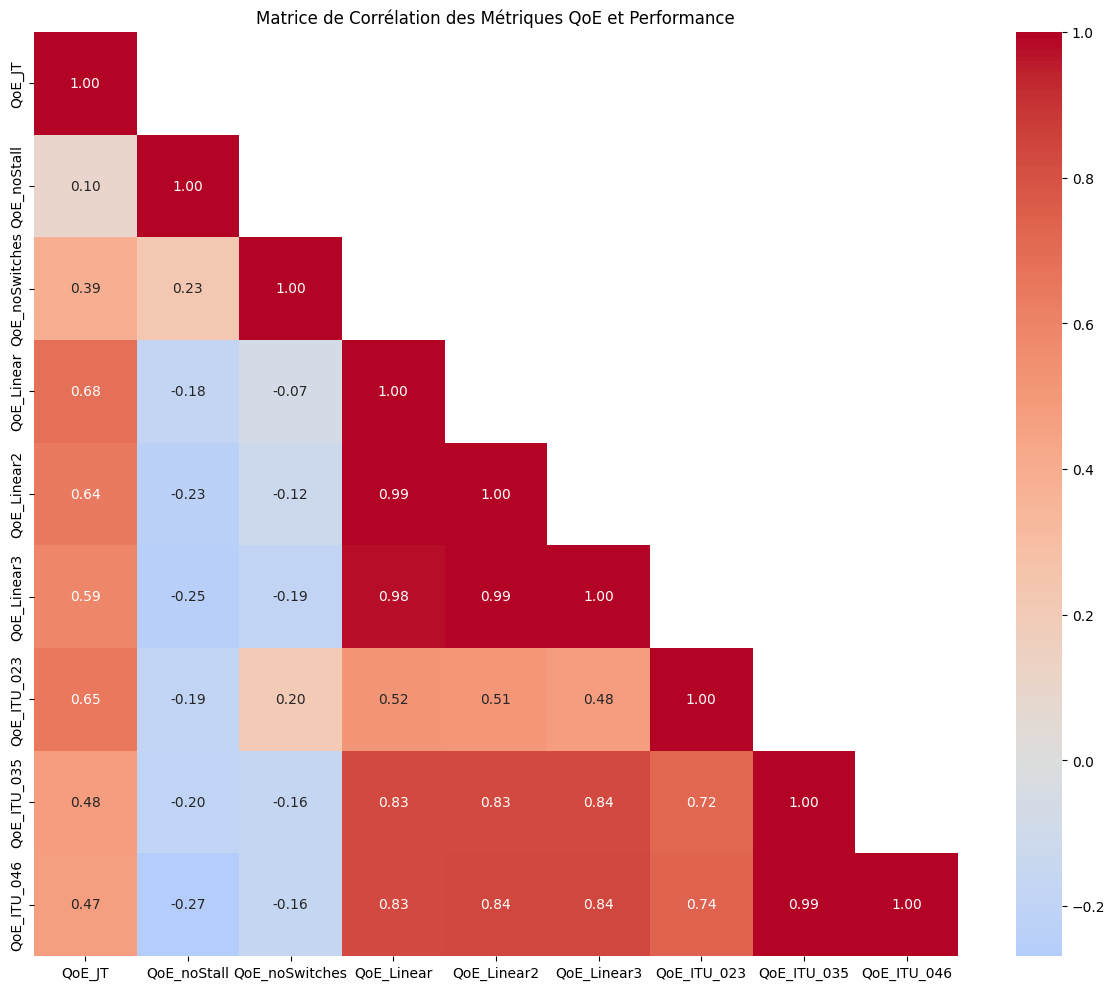

In [8]:
columns_to_analyze = ['QoE_JT', 'QoE_noStall', 'QoE_noSwitches',
    'QoE_Linear', 'QoE_Linear2', 'QoE_Linear3',
    'QoE_ITU_023', 'QoE_ITU_035', 'QoE_ITU_046']




correlation_matrix = df_cleaned[columns_to_analyze].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Création du heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True,
            mask=mask)
plt.title('Matrice de Corrélation des Métriques QoE et Performance')
plt.show()

### QoE_JT (Qualité d'Expérience basée sur le temps de démarrage) :

    Corrélations Positives Fortes : QoE_JT est fortement corrélé avec QoE_Linear (0.68), QoE_Linear2 (0.64), QoE_Linear3 (0.59), et QoE_ITU_023 (0.65).

### QoE_Linear (Évaluation linéaire de la Qualité d'Expérience) :

    Corrélations Positives Fortes : QoE_Linear est fortement corrélé avec QoE_Linear2 (0.99), QoE_Linear3 (0.98), QoE_ITU_023 (0.52), QoE_ITU_035 (0.83), et QoE_ITU_046 (0.83).


### oE_Linear2 et QoE_Linear3 :

    Corrélations Positives Fortes : QoE_Linear2 et QoE_Linear3 sont fortement corrélés entre eux (0.99) et avec QoE_ITU_023, QoE_ITU_035, et QoE_ITU_046.



    Problème : La multicolinéarité se produit lorsque plusieurs variables indépendantes dans un modèle de régression sont fortement corrélées. Cela peut rendre difficile l'estimation de l'impact individuel de chaque variable sur la variable dépendante.
    Effet : Cela peut entraîner une instabilité des coefficients estimés, rendant le modèle moins interprétable et moins fiable.



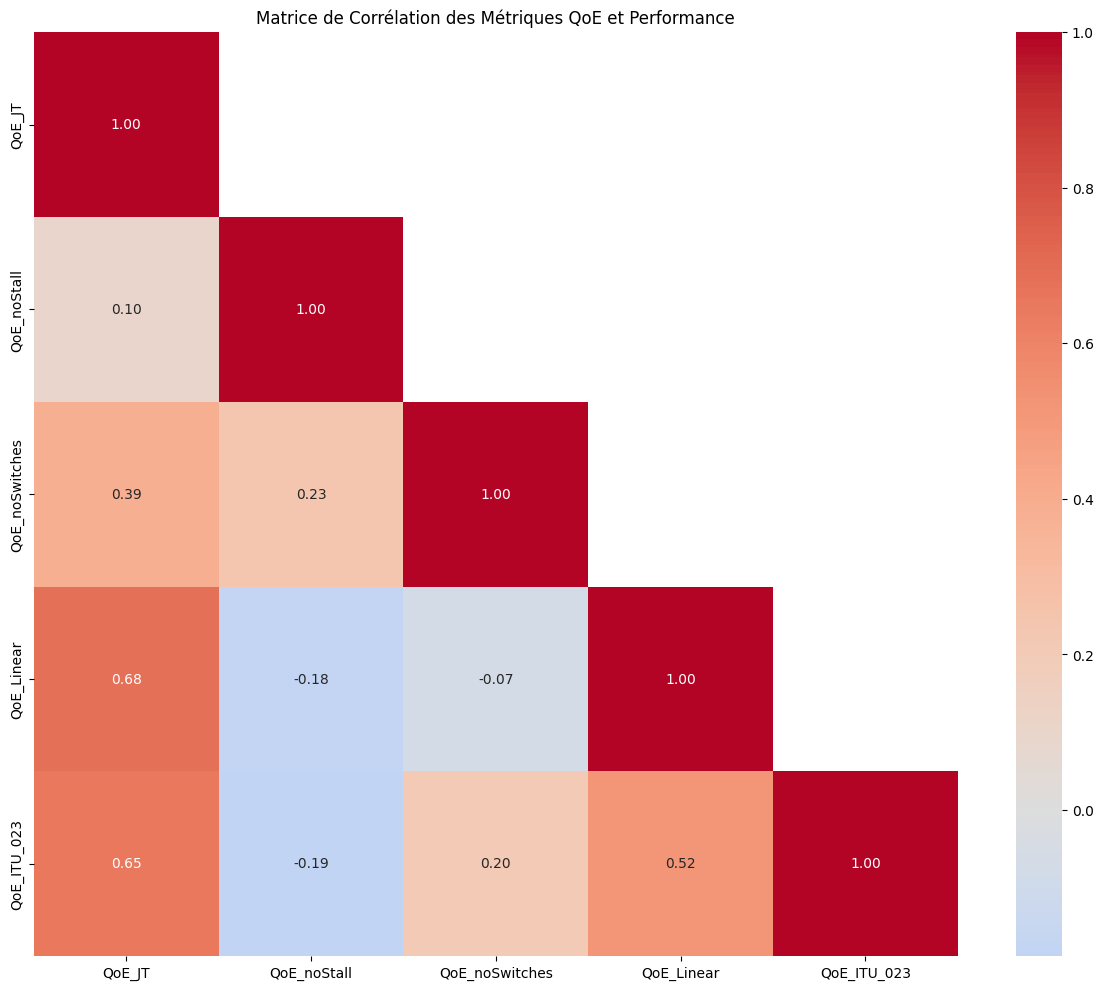

In [9]:
columns_to_analyze = ['QoE_JT', 'QoE_noStall', 'QoE_noSwitches',
    'QoE_Linear','QoE_ITU_023']


correlation_matrix = df_cleaned[columns_to_analyze].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Création du heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True,
            mask=mask)
plt.title('Matrice de Corrélation des Métriques QoE et Performance')
plt.show()

In [10]:
target = 'QoE_Linear' # Sélection de la variable cible (QoE_Linear)

# Sélection des caractéristiques (en excluant les autres métriques QoE)
features = [col for col in df_cleaned.columns if col not in columns_to_analyze]

# Préparation des données
X = df_cleaned[features]
y = df_cleaned[target]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Définition des paramètres pour la recherche aléatoire
param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [16, 32, 64, 128, 256],
    'min_impurity_decrease': [0, 0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Création du modèle de base
tree = DecisionTreeRegressor(random_state=42)

# Recherche aléatoire des meilleurs hyperparamètres
search = RandomizedSearchCV(
    estimator=tree,
    param_distributions=param_grid,
    n_iter=50,  # Nombre de configurations à tester
    scoring='neg_mean_squared_error',
    cv=5,  # Validation croisée à 5 plis
    verbose=2,
    random_state=42,
    n_jobs=-1  # Utilisation de tous les CPUs
)



In [12]:
def search_or_load(model_filename, search, X_train, y_train):
    if isfile(model_filename):
        print("Chargement du modèle existant")
        model = pickle.load(open(model_filename, 'rb'))
    else:
        print("Recherche des meilleurs hyperparamètres")
        search.fit(X_train, y_train)
        print("Meilleurs paramètres trouvés:", search.best_params_)
        model = search.best_estimator_
        print("Entraînement du modèle")
        model.fit(X_train, y_train)
        pickle.dump(model, open(model_filename, 'wb'))
        print("Modèle sauvegardé dans", model_filename)
    return model

In [ ]:
model_filename = 'qoe_decision_tree.pkl'
model = search_or_load(model_filename, search, X_train, y_train)

# Évaluation du modèle
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nPerformance du modèle:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Visualisation de l'arbre
plt.figure(figsize=(20,10))
plot_tree(model, 
          feature_names=features,
          class_names=target,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Arbre de Décision CART pour la Prédiction de QoE")
plt.show()

# Importance des caractéristiques
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 des caractéristiques les plus importantes:")
print(feature_importance.head(10))

# Visualisation de l'importance des caractéristiques
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance.head(10))), 
        feature_importance.head(10)['importance'])
plt.xticks(range(len(feature_importance.head(10))), 
           feature_importance.head(10)['feature'], 
           rotation=45, 
           ha='right')
plt.title('Top 10 des Caractéristiques les Plus Importantes')
plt.tight_layout()
plt.show()